In [4]:
# Import pandas for data manipulation
import pandas as pd

# Load the RFM table created in notebook 02
rfm = pd.read_csv("../data/processed/rfm_table.csv")

# Show the first rows to confirm it loaded correctly
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,32,11,2946.80,4,5,5,455
1,105,7,2949.42,2,3,5,235
2,31,6,1850.35,4,2,3,423
3,90,8,2077.26,2,4,4,244
4,72,12,2756.33,3,5,5,355


In [5]:
# Select the numeric RFM features for clustering
X = rfm[["Recency", "Frequency", "Monetary"]]

# Show the first rows
X.head()


,Recency,Frequency,Monetary
0,32,11,2946.80
1,105,7,2949.42
2,31,6,1850.35
3,90,8,2077.26
4,72,12,2756.33


In [6]:
# Select the numeric features for clustering (RFM values)
X = rfm[["Recency", "Frequency", "Monetary"]]

# Show the first rows to confirm
X.head()


,Recency,Frequency,Monetary
0,32,11,2946.80
1,105,7,2949.42
2,31,6,1850.35
3,90,8,2077.26
4,72,12,2756.33


In [7]:
# Import StandardScaler from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create the scaler (this object will scale the RFM features)
scaler = StandardScaler()

# Fit the scaler on the numeric RFM data and transform it
X_scaled = scaler.fit_transform(X)

# Show the first rows of the scaled data
X_scaled[:5]


array([[-0.61067169,  1.56888624,  1.23401043],
       [ 0.25792024,  0.12068356,  1.23681909],
       [-0.62257021, -0.24136711,  0.05860715],
       [ 0.07944245,  0.48273423,  0.30185651],
       [-0.1347309 ,  1.93093691,  1.02982505]])

In [8]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

# Create the K-Means model with 4 clusters (you can change this number later)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model on the scaled data
kmeans.fit(X_scaled)

# Add the resulting cluster labels to the RFM table
rfm["Cluster"] = kmeans.labels_

# Show the first rows with the new Cluster column
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Cluster
0,32,11,2946.80,4,5,5,455,0
1,105,7,2949.42,2,3,5,235,2
2,31,6,1850.35,4,2,3,423,2
3,90,8,2077.26,2,4,4,244,2
4,72,12,2756.33,3,5,5,355,0


In [9]:
# Save the RFM table with cluster labels to the processed folder
rfm.to_csv("../data/processed/rfm_with_clusters.csv", index=False)

"File saved: rfm_with_clusters.csv"



'File saved: rfm_with_clusters.csv'

In [10]:
# Summary statistics for each cluster
cluster_summary = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,57.12,10.70,3283.87
1,66.80,4.20,937.81
2,56.60,7.50,2003.73
3,275.72,4.59,1250.81


In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean, professional style
sns.set(style="whitegrid", palette="muted")


/var/folders/vw/4q_d4m2d4bnbm2htmtjyb2nw0000gn/T/ipykernel_29503/1090405942.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


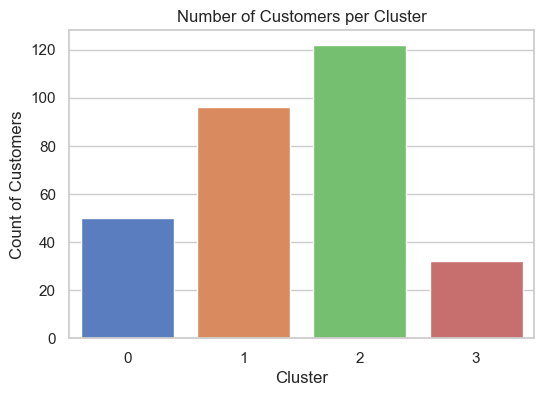

In [13]:
# -------------------------------------------------------------
# Plot the distribution of customers across the different clusters
# This helps us understand how many clients belong to each group
# -------------------------------------------------------------

plt.figure(figsize=(6,4))  # Set the figure size for better readability

sns.countplot(
    data=rfm,      # Use the RFM dataset
    x="Cluster",   # Cluster category on the x-axis
    palette="muted"  # Color palette for visual style
)

plt.title("Number of Customers per Cluster")   # Add a descriptive title
plt.xlabel("Cluster")                          # Label for x-axis
plt.ylabel("Count of Customers")               # Label for y-axis
plt.show()                                     # Display the plot


/var/folders/vw/4q_d4m2d4bnbm2htmtjyb2nw0000gn/T/ipykernel_29503/446523579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


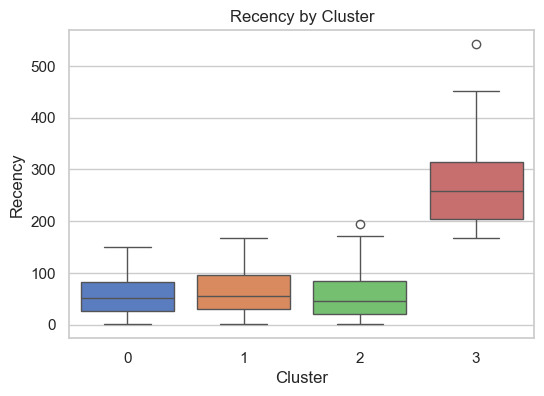

In [14]:
# -----------------------------------------------------------------------
# Boxplot of Recency for each cluster
# Recency = How recently a customer made their last purchase
# Boxplots help visualize the distribution, median, and outliers per group
# -----------------------------------------------------------------------

plt.figure(figsize=(6,4))

sns.boxplot(
    data=rfm,
    x="Cluster",     # Compare clusters
    y="Recency",     # Distribution of recency values
    palette="muted"
)

plt.title("Recency by Cluster")  # Describe what the plot shows
plt.show()


/var/folders/vw/4q_d4m2d4bnbm2htmtjyb2nw0000gn/T/ipykernel_29503/1777083107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


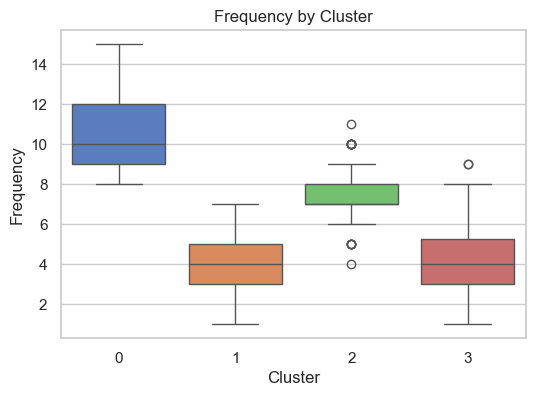

In [15]:
# -----------------------------------------------------------------------
# Boxplot of Frequency for each cluster
# Frequency = How many times a customer made purchases
# This shows customer engagement level inside each cluster
# -----------------------------------------------------------------------

plt.figure(figsize=(6,4))

sns.boxplot(
    data=rfm,
    x="Cluster",
    y="Frequency",
    palette="muted"
)

plt.title("Frequency by Cluster")
plt.show()


/var/folders/vw/4q_d4m2d4bnbm2htmtjyb2nw0000gn/T/ipykernel_29503/1749141416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


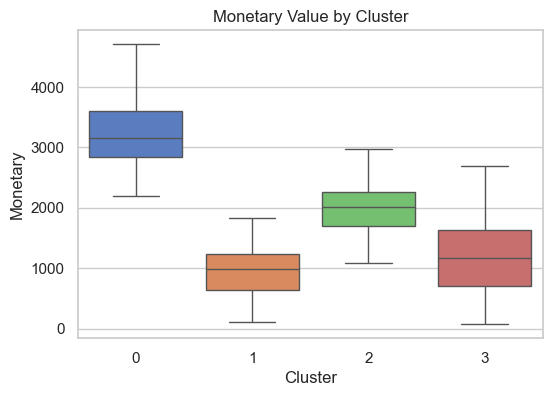

In [17]:
# -----------------------------------------------------------------------
# Boxplot of Monetary Value for each cluster
# Monetary = How much money a customer has spent in total
# Helps identify high-value vs low-value customer groups
# -----------------------------------------------------------------------

plt.figure(figsize=(6,4))

sns.boxplot(
    data=rfm,
    x="Cluster",
    y="Monetary",
    palette="muted"
)

plt.title("Monetary Value by Cluster")
plt.show()
